In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict


In [2]:
# Try with 2021 data first

data_2021 = pd.read_csv('../data/img_scout_dfs/2021/skysat_scout_2021.csv')

In [3]:
def add_vis(df):
    df['ndvi']= (df['nir']-df['red'])/(df['nir']+df['red'])
    df['evi']= 2.5*(df['nir']-df['red'])/(df['nir']+6*df['red']-7.5*df['blue']+1)
    df['savi']= 1.5*(df['nir']-df['red'])/(df['nir']+df['red']+0.5)
    df['sr']= df['nir']/df['red']
    df['msr']= ((df['nir']/df['red'])-1)/(np.sqrt((df['nir']/df['red'])+1))
    #df['dvi']= df['nir']-df['red']
    #df['nirv']= df['ndvi']*df['nir']
    df['gcc']=df['green']/(df['green']+df['red']+df['blue'])
    #df['tvi']=0.5*(120*(df['nir']-df['green'])-200*(df['red']-df['green']))
    df['arvi']=(df['nir']-(2*df['red']-df['blue']))/(df['nir']+(2*df['red']-df['blue']))
    
    return df

In [4]:
add_vis(data_2021)

,acquired,plot,blue,green,red,nir,row,panel,Date,Treatment,...,total_dis,geometry,centroid,ndvi,evi,savi,sr,msr,gcc,arvi
0,20210707,1,0.032006,0.066432,0.040084,0.290003,1,1,2021-07-07,5.0,...,0.05,POLYGON ((-77.0152645742787 42.878300949250196...,POINT (-77.0153084903025 42.8783140936145),0.757132,0.484168,0.451614,7.234911,2.172705,0.479577,0.715161
1,20210707,2,0.033528,0.067879,0.043324,0.270290,1,2,2021-07-07,7.0,...,0.10,POLYGON ((-77.01535545427274 42.87831851925121...,POINT (-77.0153965503027 42.87833067861654),0.723710,0.443716,0.418440,6.238777,1.947141,0.469003,0.671497
2,20210707,3,0.033903,0.067897,0.042947,0.273817,1,3,2021-07-07,9.0,...,0.10,POLYGON ((-77.01544069426711 42.87833411925217...,POINT (-77.01548247530272 42.87834674861851),0.728841,0.451899,0.423997,6.375737,1.979408,0.469072,0.680854
3,20210707,4,0.032868,0.067358,0.042055,0.280455,1,4,2021-07-07,15.0,...,0.60,POLYGON ((-77.01552730426143 42.87835065925314...,POINT (-77.01557007030289 42.87836309362055),0.739203,0.463353,0.434767,6.668789,2.047043,0.473417,0.691031
4,20210707,5,0.032104,0.066636,0.038836,0.292664,1,5,2021-07-07,3.0,...,0.10,POLYGON ((-77.01561588425558 42.87836680925413...,POINT (-77.01565649030296 42.878378758622546),0.765697,0.493868,0.457899,7.535957,2.237088,0.484359,0.730553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,20210816,303,0.017663,0.065519,0.048503,0.248441,19,15,2021-08-17,18.0,...,13.20,POLYGON ((-77.01536426393243 42.87876078918534...,POINT (-77.01540822030267 42.878773523616815),0.673318,0.355257,0.376320,5.122157,1.665990,0.497544,0.515878
1191,20210816,305,0.009077,0.061277,0.038242,0.256381,20,1,2021-08-17,31.0,...,0.90,POLYGON ((-77.01658187329902 42.87901510909438...,POINT (-77.01662629530372 42.8790284536449),0.740401,0.384656,0.411778,6.704175,2.055085,0.564266,0.583637
1192,20210816,307,0.009167,0.060350,0.038300,0.249923,20,3,2021-08-17,40.0,...,17.05,POLYGON ((-77.0164079733105 42.878982759092416...,POINT (-77.01645016030366 42.87899534864085),0.734234,0.374960,0.402722,6.525413,2.014186,0.559746,0.575031
1193,20210816,309,0.011672,0.062224,0.041776,0.253272,20,5,2021-08-17,14.0,...,0.05,POLYGON ((-77.01623108332213 42.87894828909042...,POINT (-77.01627422530342 42.878961353636775),0.716820,0.373304,0.399026,6.062650,1.904996,0.537934,0.557872


In [5]:
# Label data by disease severity

data_2021['disease_sev']='high'
data_2021.loc[data_2021['DM_severity'] < 10, 'disease_sev'] = 'low'

In [72]:
# Limit to just DM rows

data_2021 = data_2021[data_2021['row']<=5]

In [73]:
#define predictor and response variables

features = ['red', 'green', 'blue', 'nir','evi', 'arvi', 'savi', 'ndvi']

X = data_2021[features]
y = data_2021['DM_severity']

In [74]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 


In [77]:
np.arange(1,9)

array([1, 2, 3, 4, 5, 6, 7, 8])

280


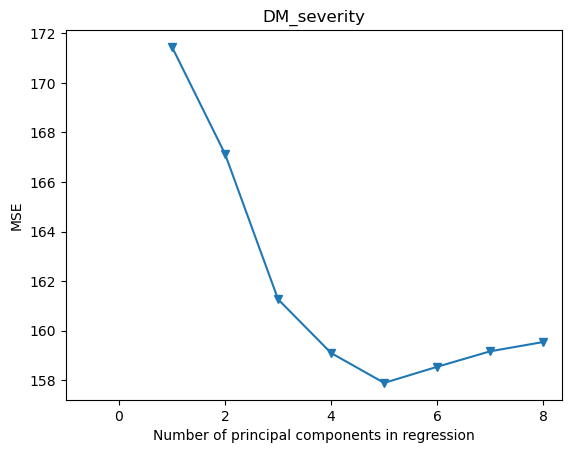

In [78]:
# Determine best # of principal components

n = len(X_train)
print(n)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=2)

mse = []

for i in np.arange(1, 9):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 9), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('DM_severity')
plt.xlim(xmin=-1)
plt.show()

In [79]:
mse_min = np.argmin(mse)

In [80]:
#calculate RMSE
pls = PLSRegression(n_components=mse_min+1)
pls.fit(scale(X_train), y_train)

np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))

11.056827190949827

R2 calib: 0.285
R2 CV: 0.237
MSE calib: 139.948
MSE CV: 149.174


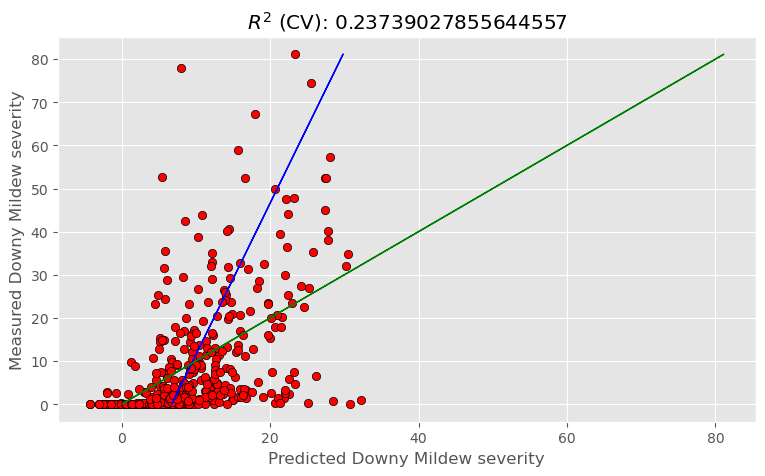

In [81]:
pls_opt = PLSRegression(n_components=mse_min+1)
 
# Fit to the entire dataset
pls_opt.fit(X, y)
y_c = pls_opt.predict(X)
 
# Cross-validation
y_cv = cross_val_predict(pls_opt, X, y, cv=10)
 
# Calculate scores for calibration and cross-validation
score_c = r2_score(y, y_c)
score_cv = r2_score(y, y_cv)
 
# Calculate mean squared error for calibration and cross validation
mse_c = mean_squared_error(y, y_c)
mse_cv = mean_squared_error(y, y_cv)
 
print('R2 calib: %5.3f'  % score_c)
print('R2 CV: %5.3f'  % score_cv)
print('MSE calib: %5.3f' % mse_c)
print('MSE CV: %5.3f' % mse_cv)
 
# Plot regression and figures of merit
rangey = max(y) - min(y)
rangex = max(y_c) - min(y_c)
 
# Fit a line to the CV vs response
z = np.polyfit(y, y_c, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_c, y, c='red', edgecolors='k')
    
    #Plot the best fit line
    ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
    #Plot the ideal 1:1 line
    
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('$R^{2}$ (CV): '+str(score_cv))
    plt.xlabel('Predicted Downy Mildew severity')
    plt.ylabel('Measured Downy Mildew severity')
    
    plt.show()